# Task 1: Acquire, preprocess, and analyze the data

In [294]:
import pandas as pd 
import numpy as np 
from scipy.io.arff import loadarff 
import urllib.request
import io 
import matplotlib.pyplot as plt

In [295]:
# dataset urls 
hepatitisUrl = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
diabeticRetUrl = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"

In [296]:
# load data into pandas dataframe 
hepdata = pd.read_csv(hepatitisUrl)
hepdata.columns = ["Class", "Age", "Sex", "Steroid", "Antivirals", "Fatigue", "Malaise", "Anorexia", "Liver Big", "Liver Firm", "Spleen Palpable", "Spiders", "Ascites", "Varices", "Bilirubin", "Alk Phosphate",
                   "Sgot", "Albumin", "Protime", "Histology"]

ftpstream = urllib.request.urlopen(diabeticRetUrl)
dr_rawdata, meta = loadarff(io.StringIO(ftpstream.read().decode('utf-8')))
drdata = pd.DataFrame(dr_rawdata)
drdata.columns = ["Quality", "Pre-Screening", "MA 0.5", "MA 0.6", "MA 0.7", "MA 0.8", "MA 0.9", "MA 1.0", "Exudates 0.3", "Exudates 0.4", "Exudates 0.5", "Exudates 0.6", "Exudates 0.7", "Exudates 0.8", 
                  "Exudates 0.9", "Exudates 1.0", "Macula-OpticDisc Dist", "Optic Disc Diameter", "AM/FM-based", "Class"]

In [297]:
hepdata.head(5)

Class  Age  Sex Steroid  ...  Sgot Albumin Protime Histology
0      2   50    1       1  ...    42     3.5       ?         1
1      2   78    1       2  ...    32     4.0       ?         1
2      2   31    1       ?  ...    52     4.0      80         1
3      2   34    1       2  ...   200     4.0       ?         1
4      2   34    1       2  ...    28     4.0      75         1

[5 rows x 20 columns]

In [298]:
drdata.head(5)

Quality  Pre-Screening  MA 0.5  ...  Optic Disc Diameter  AM/FM-based  Class
0      1.0            1.0    22.0  ...             0.100025          1.0   b'0'
1      1.0            1.0    24.0  ...             0.144414          0.0   b'0'
2      1.0            1.0    62.0  ...             0.128548          0.0   b'1'
3      1.0            1.0    55.0  ...             0.114790          0.0   b'0'
4      1.0            1.0    44.0  ...             0.123572          0.0   b'1'

[5 rows x 20 columns]

In [299]:
# Clean the data 

# remove all malformed rows
hepdata = hepdata.drop(hepdata[hepdata.eq("?").any(1)].index)
drdata = drdata.drop(drdata[drdata.eq("?").any(1)].index)

# process the Class label in DR dataset (byte to int)
drdata["Class"] = drdata["Class"].apply(lambda x: 1 if x == bytes(b'1') else 0)


In [300]:
hep_booleanFeat = ["Class"]
for x in hep_booleanFeat:
  hepdata[x] = hepdata[x].apply(lambda m: 0 if m == 1 else 1)


In [301]:
hepdata.head(5)

Class  Age  Sex Steroid  ...  Sgot Albumin Protime Histology
4       1   34    1       2  ...    28     4.0      75         1
9       1   39    1       1  ...    30     4.4      85         1
10      1   32    1       2  ...   249     3.7      54         1
11      1   41    1       2  ...    60     3.9      52         1
12      1   30    1       2  ...   144     4.9      78         1

[5 rows x 20 columns]

In [302]:
drdata.head(5)

Quality  Pre-Screening  MA 0.5  ...  Optic Disc Diameter  AM/FM-based  Class
0      1.0            1.0    22.0  ...             0.100025          1.0      0
1      1.0            1.0    24.0  ...             0.144414          0.0      0
2      1.0            1.0    62.0  ...             0.128548          0.0      1
3      1.0            1.0    55.0  ...             0.114790          0.0      0
4      1.0            1.0    44.0  ...             0.123572          0.0      1

[5 rows x 20 columns]

## Data Investigation

In [303]:
hepdata.shape

(80, 20)

In [304]:
drdata.shape

(1151, 20)

In [305]:
hepdata.dtypes

Class               int64
Age                 int64
Sex                 int64
Steroid            object
Antivirals          int64
Fatigue            object
Malaise            object
Anorexia           object
Liver Big          object
Liver Firm         object
Spleen Palpable    object
Spiders            object
Ascites            object
Varices            object
Bilirubin          object
Alk Phosphate      object
Sgot               object
Albumin            object
Protime            object
Histology           int64
dtype: object

In [306]:
# we need to convert the object type into numbers

for feature in hepdata.columns:
  if feature != "Class":
    hepdata[feature] = hepdata[feature].astype(str).astype(float)

In [307]:
hepdata.dtypes

Class                int64
Age                float64
Sex                float64
Steroid            float64
Antivirals         float64
Fatigue            float64
Malaise            float64
Anorexia           float64
Liver Big          float64
Liver Firm         float64
Spleen Palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk Phosphate      float64
Sgot               float64
Albumin            float64
Protime            float64
Histology          float64
dtype: object

In [308]:
drdata.dtypes

Quality                  float64
Pre-Screening            float64
MA 0.5                   float64
MA 0.6                   float64
MA 0.7                   float64
MA 0.8                   float64
MA 0.9                   float64
MA 1.0                   float64
Exudates 0.3             float64
Exudates 0.4             float64
Exudates 0.5             float64
Exudates 0.6             float64
Exudates 0.7             float64
Exudates 0.8             float64
Exudates 0.9             float64
Exudates 1.0             float64
Macula-OpticDisc Dist    float64
Optic Disc Diameter      float64
AM/FM-based              float64
Class                      int64
dtype: object

## Basic Statistics

In [309]:

hepdata.describe()


Class       Age        Sex  ...    Albumin     Protime  Histology
count  80.000000  80.00000  80.000000  ...  80.000000   80.000000   80.00000
mean    0.837500  40.66250   1.137500  ...   3.843750   62.512500    1.41250
std     0.371236  11.28003   0.346547  ...   0.576292   23.427774    0.49539
min     0.000000  20.00000   1.000000  ...   2.100000    0.000000    1.00000
25%     1.000000  32.00000   1.000000  ...   3.500000   46.000000    1.00000
50%     1.000000  38.50000   1.000000  ...   4.000000   62.000000    1.00000
75%     1.000000  49.25000   1.000000  ...   4.200000   77.250000    2.00000
max     1.000000  72.00000   2.000000  ...   5.000000  100.000000    2.00000

[8 rows x 20 columns]

In [310]:
drdata.describe()

Quality  Pre-Screening  ...  AM/FM-based        Class
count  1151.000000    1151.000000  ...  1151.000000  1151.000000
mean      0.996525       0.918332  ...     0.336229     0.530843
std       0.058874       0.273977  ...     0.472624     0.499265
min       0.000000       0.000000  ...     0.000000     0.000000
25%       1.000000       1.000000  ...     0.000000     0.000000
50%       1.000000       1.000000  ...     0.000000     1.000000
75%       1.000000       1.000000  ...     1.000000     1.000000
max       1.000000       1.000000  ...     1.000000     1.000000

[8 rows x 20 columns]

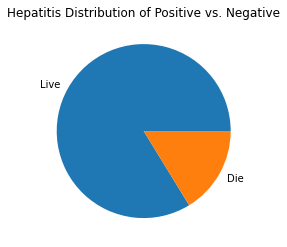

In [311]:
hep_pos = len(hepdata[hepdata["Class"].isin([1])])
hep_neg = len(hepdata) - hep_pos

heplabels = ["Live", "Die"]
hepPNData = np.array([hep_pos, hep_neg])
plt.pie(hepPNData, labels=heplabels)
plt.title("Hepatitis Distribution of Positive vs. Negative")
plt.show()

Text(0.5, 1.0, 'Positive vs. Negative of Hepatitis Dataset')

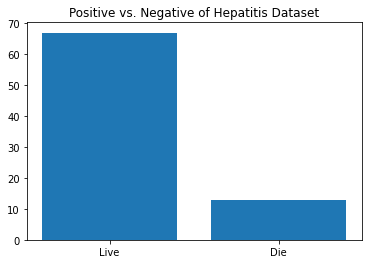

In [312]:
x = np.arange(2)
plt.bar(x, height=[hep_pos, hep_neg])
plt.xticks(x, ['Live','Die']);
plt.title("Positive vs. Negative of Hepatitis Dataset")

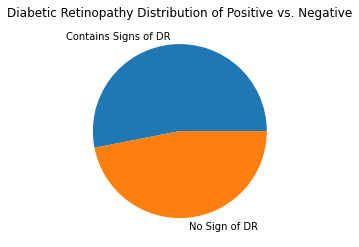

In [313]:
dr_pos = len(drdata[drdata["Class"].isin([1])])
dr_neg = len(drdata) - dr_pos

drlabels = ["Contains Signs of DR", "No Sign of DR"]
drPNData = np.array([dr_pos, dr_neg])
plt.pie(drPNData, labels=drlabels)
plt.title("Diabetic Retinopathy Distribution of Positive vs. Negative")
plt.show()

Text(0.5, 1.0, 'Positive vs. Negative of Diabetic Retinopathy')

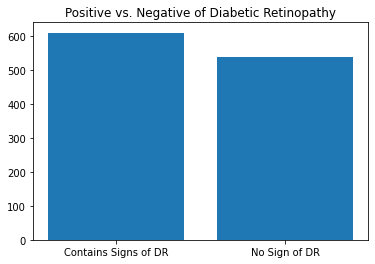

In [314]:
plt.bar(x, height=[dr_pos, dr_neg])
plt.xticks(x, ['Contains Signs of DR','No Sign of DR']);
plt.title("Positive vs. Negative of Diabetic Retinopathy")

Age
Sex
Steroid
Antivirals
Fatigue
Malaise
Anorexia
Liver Big
Liver Firm
Spleen Palpable
Spiders
Ascites
Varices
Bilirubin
Alk Phosphate
Sgot
Albumin
Protime
Histology


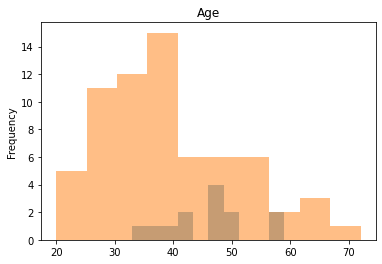

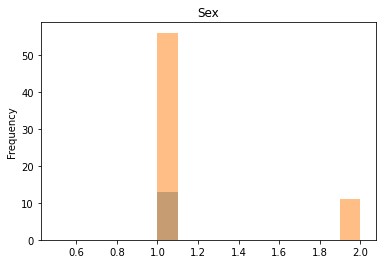

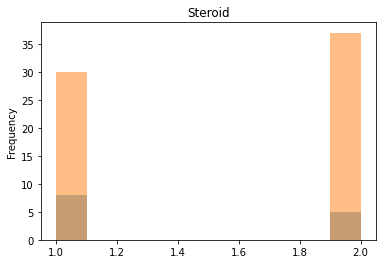

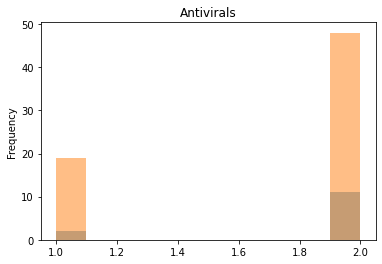

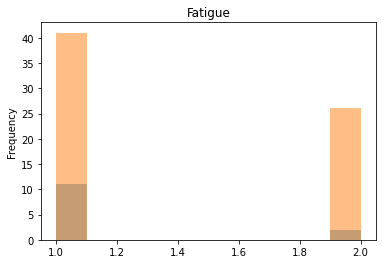

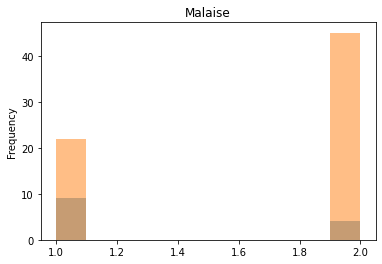

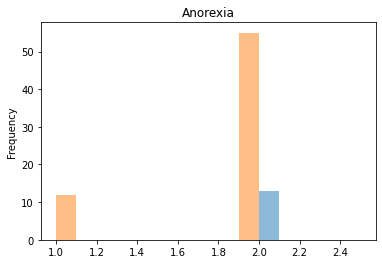

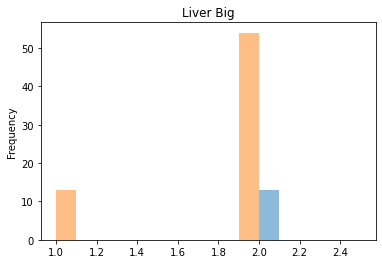

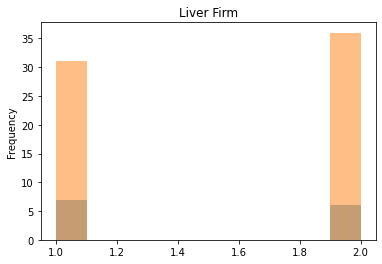

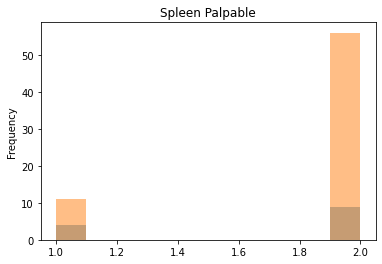

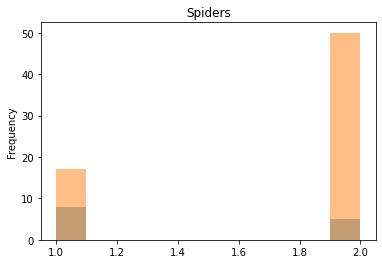

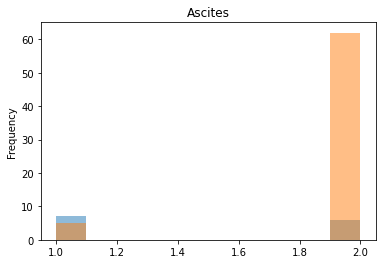

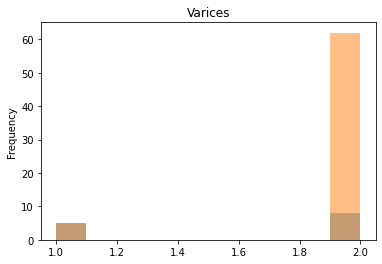

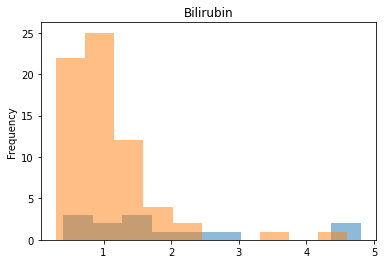

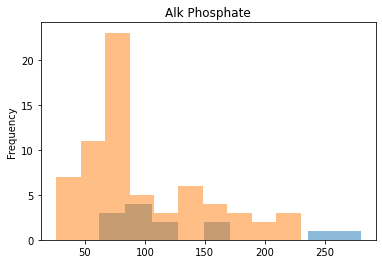

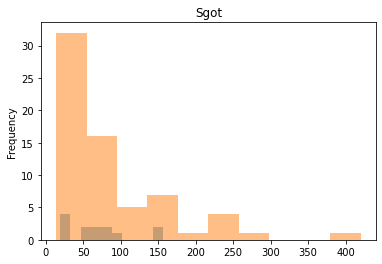

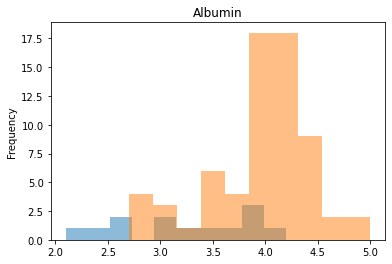

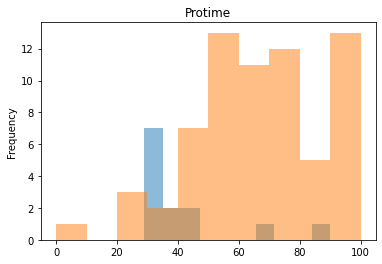

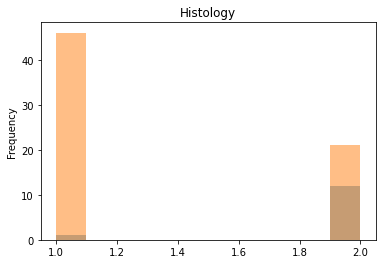

In [315]:
for x in hepdata.columns:
  if x != 'Class':
    print(x)
    fig, ax = plt.subplots()
    plt.title(x)
    hepdata.groupby("Class")[x].plot.hist(alpha=0.5)
    # hepdata.groupby("Class")[x].plot.kde()
    # fig.savefig(x + '.png')

Quality
Pre-Screening
MA 0.5
MA 0.6
MA 0.7
MA 0.8
MA 0.9
MA 1.0
Exudates 0.3
Exudates 0.4
Exudates 0.5
Exudates 0.6
Exudates 0.7
Exudates 0.8
Exudates 0.9
Exudates 1.0
Macula-OpticDisc Dist
Optic Disc Diameter
AM/FM-based


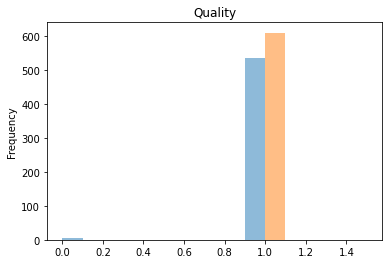

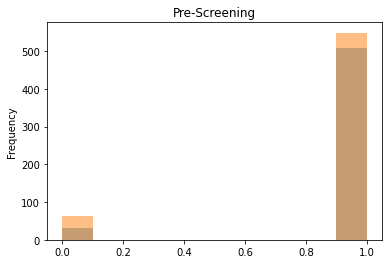

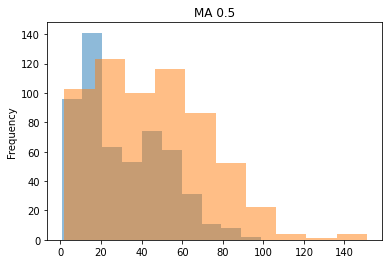

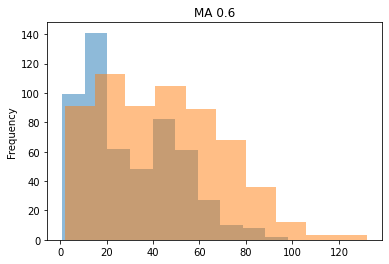

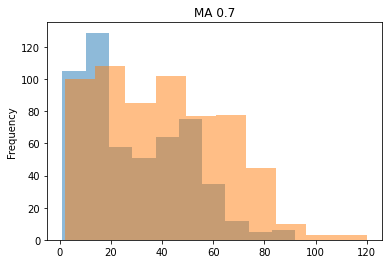

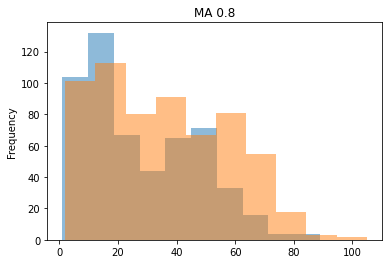

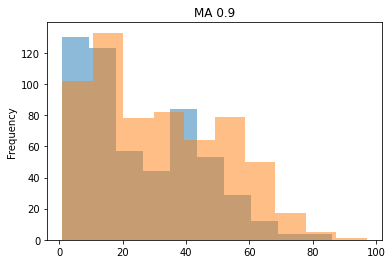

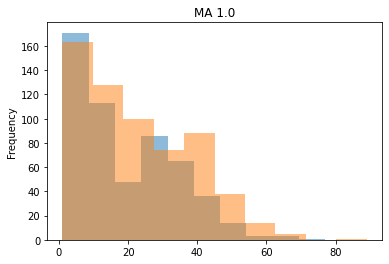

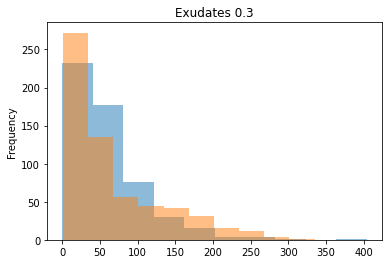

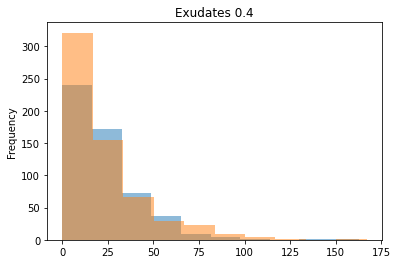

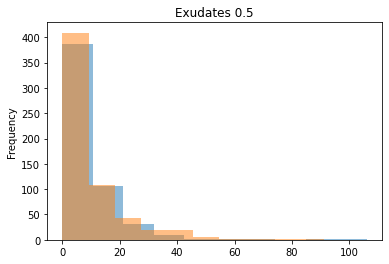

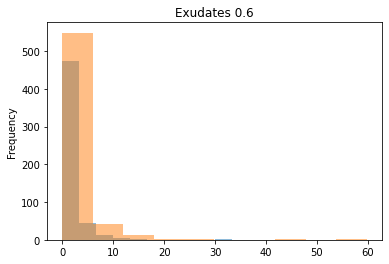

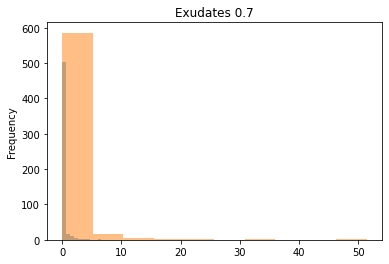

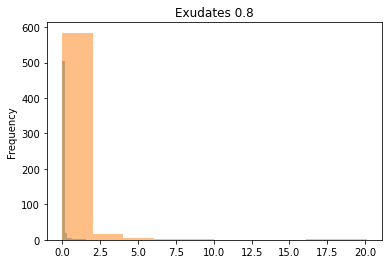

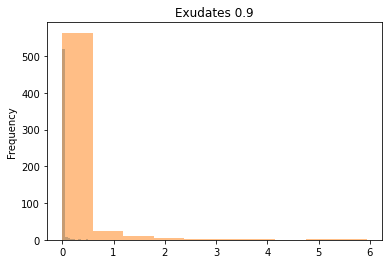

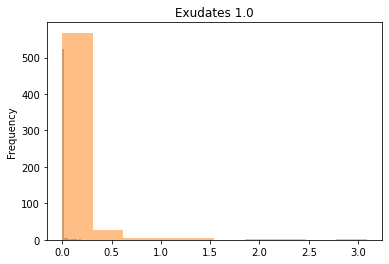

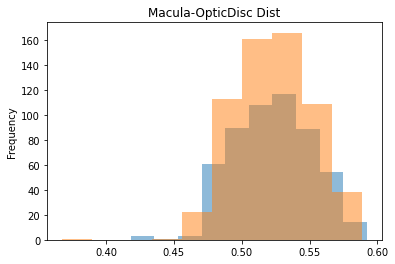

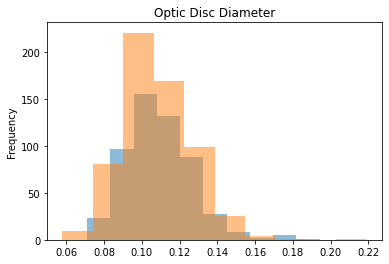

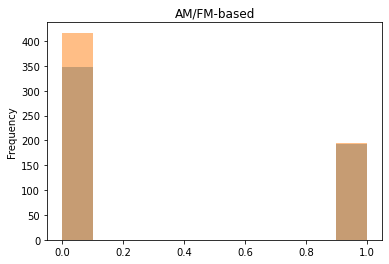

In [316]:
for x in drdata.columns:
  if x != 'Class':
    print(x)
    fig, ax = plt.subplots()
    plt.title(x)
    drdata.groupby("Class")[x].plot.hist(alpha=0.5)



## Split dataset into Test and Train

In [317]:
xhep, yhep = pd.DataFrame.to_numpy(hepdata.iloc[:, 1:]), hepdata["Class"].to_numpy()

xtrain_hep, ytrain_hep = xhep[24:], yhep[24:]
xtest_hep, ytest_hep = xhep[:24], yhep[:24]


In [318]:
xdr, ydr = pd.DataFrame.to_numpy(drdata.iloc[:, :19]), drdata["Class"].to_numpy()

xtrain_dr, ytrain_dr = xdr[345:], ydr[345:]
xtest_dr, ytest_dr = xdr[:345], ydr[:345]

# Task 2: Implement the models

## KNN

In [319]:
# Define the KNN model class
#define the metric we will use to measure similarity
#if the input shapes are [1,N1,F] and [N2,1,F] then output shape is [N2,N1]
#as numpy supports broadcasting with arithmetic operations
#for more on numpy broadcasting refer to: https://numpy.org/doc/stable/user/basics.broadcasting.html   

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
class KNN:
    def __init__(self, K=1,dist_fn = euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y, K):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        self.K = K
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        # get number of rows of matrix x_test (how many test instances)
        num_test = x_test.shape[0]

        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # None are used to keep dimensions of self.x (training set, which has shape(100,2)) and dimensions of x_test (the test set) with shape (50,2)
        # consistent so that we can apply np.sum or np.sqrt on them
        # x.shape from (100,2) -> (1,100,2)
        # x_test.shape from (50,2) -> (50,1,2)
        # (1,100,2) + (50,1,2) = (50,100) by definition
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])

        # will store the K neartest distances for all test data
        # ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        # thus we have 50 rows now (from test), each row stands for 1 data, and K = 1 col, which stands for the K (1) nearthest distance
        # the shape is (50,1), which is a 2-D array
        knns = np.zeros((num_test, self.K), dtype=int)


        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]                  # return the index of the sorted array [3,1,2] -> [1,2,0]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples [1,2,3] -> [0,1,1,1]
            # since we are counting using the index of array y (the class type in this case), we are counting for each instance, what is the prob distribution of different possible predictions
            # we keep the self.C as the minlength of each row becuase we want to find precisely the prob distribution of each diff class that the instance might belong (what is the percentage that instance x belongs to
            # class y_1?)
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        # out of the K nearest, what is the percentage of class1, class2.....classC
        # indicated by their indeices in y_test
        y_prob /= self.K
        return y_prob, knns

    def evaluate_acc(self,y_prob,y_true):
      y_pred = np.argmax(y_prob,axis=-1)
      accuracy = np.sum(y_pred == y_true)/y_true.shape[0]
      return accuracy

## Decision Tree

In [320]:
# Cost function (we will use entropy as the cost)

def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

In [321]:
# Node definition

class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [322]:
# Decision Tree definition

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_entropy, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass

In [323]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [324]:
def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

In [325]:
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

In [326]:
def evaluate_acc_DT(y_target,y_true):
  accuracy = np.sum(y_target == y_true)/y_true.shape[0]
  return accuracy

# Task 3: Run experiments

## Split Max Correlation Pair of Features

In [327]:
# get the 2 features with highest correlations with Class (besides Class itself)
print(hepdata.corr()[["Class"]].abs().sort_values(by="Class",ascending=False).iloc[1:3])
print(drdata.corr()[["Class"]].abs().sort_values(by="Class",ascending=False).iloc[1:3])

            Class
Ascites  0.479211
Albumin  0.477404
           Class
MA 0.5  0.292603
MA 0.6  0.266338


In [328]:
# Set up the feature-pair to plot
# Hep:  Alk Phosphate
C = np.max(yhep)+1
x_axis_name_hep = "Ascites"
y_axis_name_hep = "Albumin"
x_old_hep = pd.DataFrame.to_numpy(hepdata[[x_axis_name_hep,y_axis_name_hep]])

x_new_hep = x_old_hep[24:]
x0v_data_hep = hepdata[x_axis_name_hep]
x1v_data_hep = hepdata[y_axis_name_hep]
x0v_hep = np.linspace(x0v_data_hep.min(), x0v_data_hep.max(), 250)
x1v_hep = np.linspace(x1v_data_hep.min(), x1v_data_hep.max(), 250)
#to features values as a mesh  
x0_hep, x1_hep = np.meshgrid(x0v_hep, x1v_hep)
x_all_hep = np.vstack((x0_hep.ravel(),x1_hep.ravel())).T



# Dr:
x_axis_name_dr = "MA 0.5"
y_axis_name_dr = "MA 0.6"

x_old_dr = pd.DataFrame.to_numpy(drdata[[x_axis_name_dr,y_axis_name_dr]])
x_new_dr = x_old_dr[345:]
x0v_data_dr = drdata[x_axis_name_dr]
x1v_data_dr = drdata[y_axis_name_dr]

x0v_dr = np.linspace(x0v_data_dr.min(), x0v_data_dr.max(), 250)
x1v_dr = np.linspace(x1v_data_dr.min(), x1v_data_dr.max(), 250)
x0_dr,x1_dr = np.meshgrid(x0v_dr, x1v_dr)
x_all_dr = np.vstack((x0_dr.ravel(),x1_dr.ravel())).T

## KNN

In [348]:
def runKNNandPlot(kRange,distFn,x_train,y_train,x_test,y_test,x_2cols,x_all,x_axis,y_axis):
  result_list = []
  k_index = []
  for k in kRange:
    model = KNN(dist_fn=distFn)
    
    # test and train accuracy
    y_test_acc, _ = model.fit(x_train,y_train,k).predict(x_test)
    acc_test_hep = model.evaluate_acc(y_test_acc,y_test)
    y_train_acc, _ = model.fit(x_train,y_train,k).predict(x_train)
    acc_train_hep = model.evaluate_acc(y_train_acc,y_train)

    # print(f'Test accuracy with k = {k} is {acc_test_hep*100:.1f}.')
    # print(f'Train accuracy with k = {k} is {acc_train_hep*100:.1f}.')
    result_list.append([acc_test_hep,acc_train_hep,abs(acc_test_hep-acc_train_hep)])
    k_index.append(f"K = {k}")

    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(x_2cols, y_train,k).predict(x_all)
    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    plt.scatter(x_2cols[:,0], x_2cols[:,1],c=y_train_prob[:,0],marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all[:,0], marker='.', alpha=0.01)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    print("The decision boundary plot of k =",k,"is: ")
    plt.show()
  df = pd.DataFrame(result_list,columns=["Test Accuracy","Train Accuracy", "Accuracy Diff"],index=k_index)
  df = df.sort_values(by="Test Accuracy",ascending=False)
  return df

Modeling Hepdata set:
Using euclidean function:
The decision boundary plot of k = 1 is: 


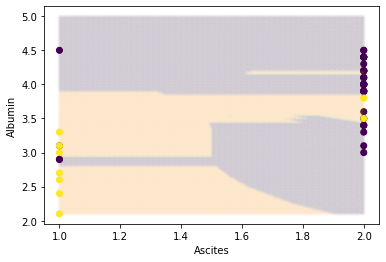

The decision boundary plot of k = 2 is: 


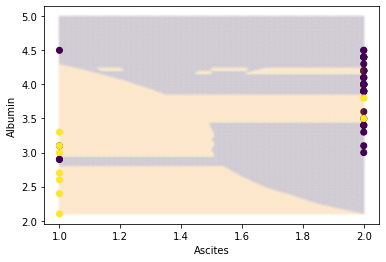

The decision boundary plot of k = 3 is: 


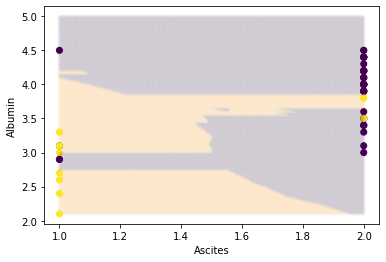

The decision boundary plot of k = 4 is: 


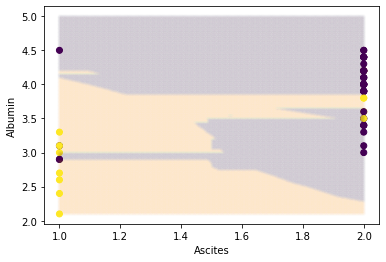

The decision boundary plot of k = 5 is: 


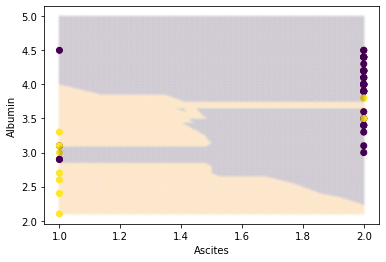

The decision boundary plot of k = 6 is: 


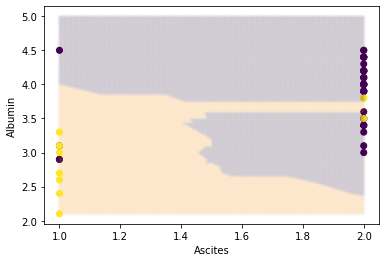

The decision boundary plot of k = 7 is: 


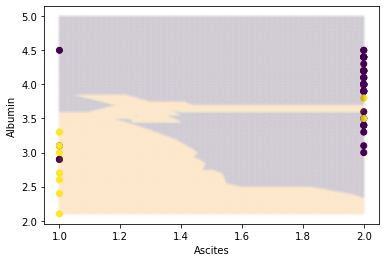

The decision boundary plot of k = 8 is: 


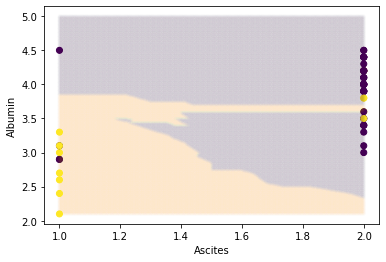

The decision boundary plot of k = 9 is: 


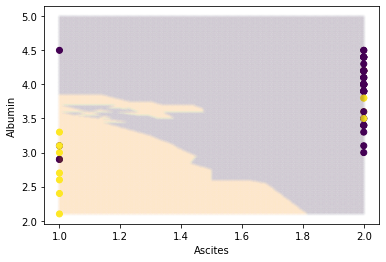

The decision boundary plot of k = 10 is: 


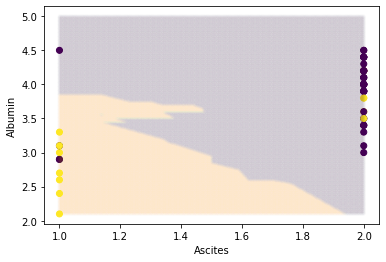

The decision boundary plot of k = 11 is: 


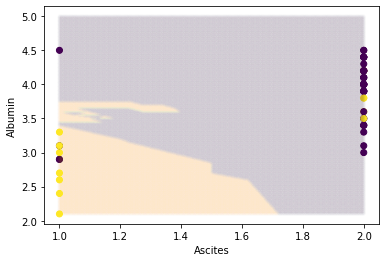

The decision boundary plot of k = 12 is: 


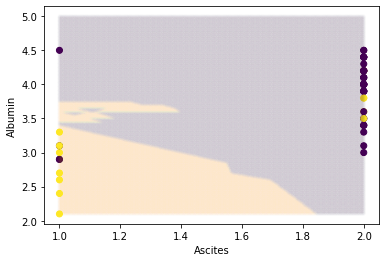

The decision boundary plot of k = 13 is: 


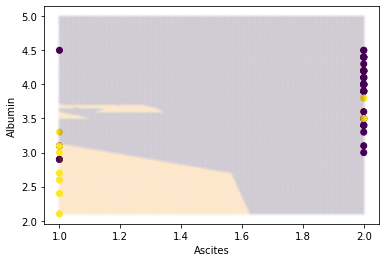

The decision boundary plot of k = 14 is: 


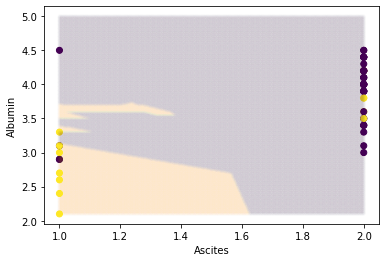

        Test Accuracy  Train Accuracy  Accuracy Diff
K = 7        0.958333        0.839286       0.119048
K = 9        0.958333        0.767857       0.190476
K = 10       0.958333        0.767857       0.190476
K = 11       0.958333        0.767857       0.190476
K = 12       0.958333        0.767857       0.190476
K = 13       0.958333        0.767857       0.190476
K = 14       0.958333        0.767857       0.190476
K = 8        0.916667        0.857143       0.059524
K = 3        0.833333        0.910714       0.077381
K = 5        0.833333        0.839286       0.005952
K = 6        0.833333        0.821429       0.011905
K = 1        0.750000        1.000000       0.250000
K = 4        0.750000        0.857143       0.107143
K = 2        0.708333        0.928571       0.220238

Using manhattan function:
The decision boundary plot of k = 1 is: 


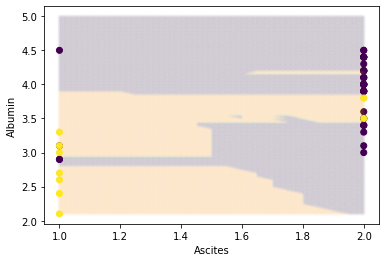

The decision boundary plot of k = 2 is: 


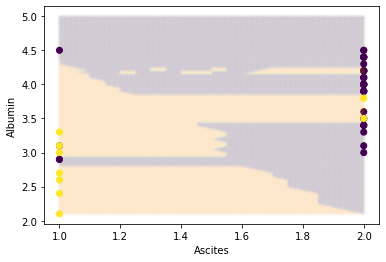

The decision boundary plot of k = 3 is: 


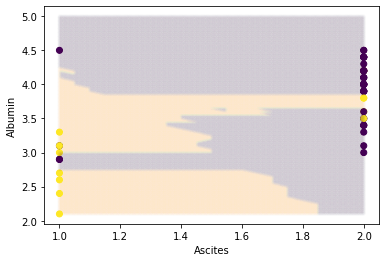

The decision boundary plot of k = 4 is: 


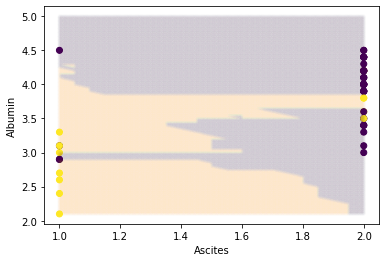

The decision boundary plot of k = 5 is: 


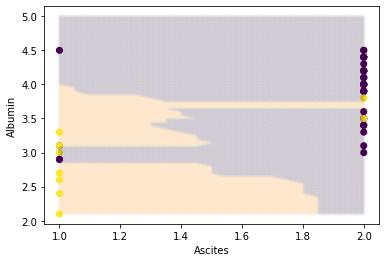

The decision boundary plot of k = 6 is: 


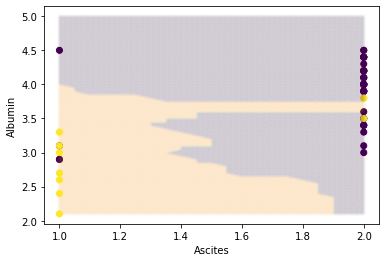

The decision boundary plot of k = 7 is: 


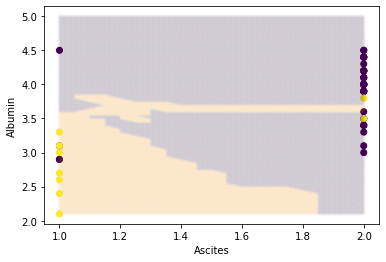

The decision boundary plot of k = 8 is: 


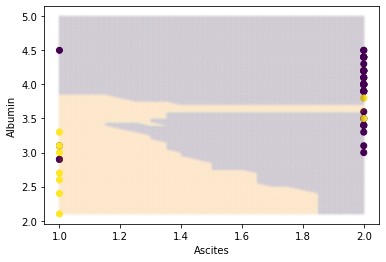

The decision boundary plot of k = 9 is: 


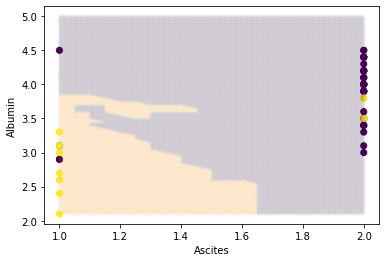

The decision boundary plot of k = 10 is: 


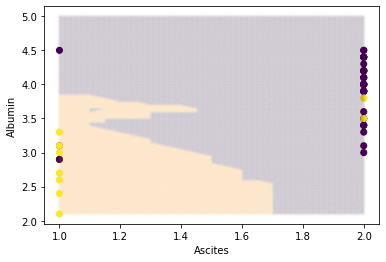

The decision boundary plot of k = 11 is: 


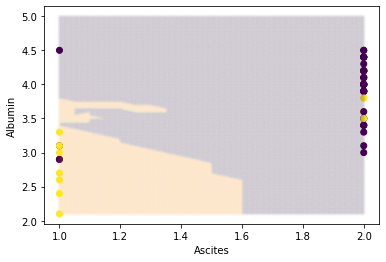

The decision boundary plot of k = 12 is: 


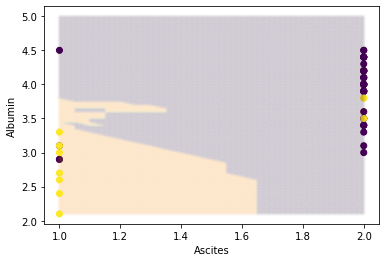

The decision boundary plot of k = 13 is: 


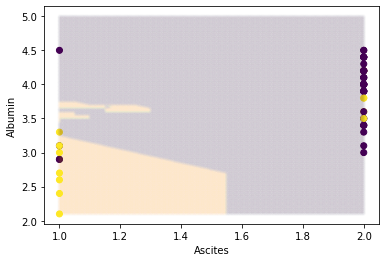

The decision boundary plot of k = 14 is: 


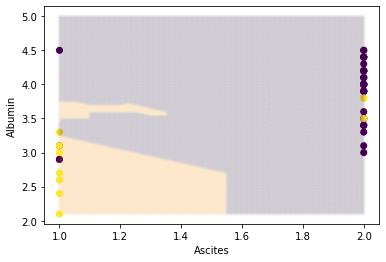

        Test Accuracy  Train Accuracy  Accuracy Diff
K = 7        0.958333        0.839286       0.119048
K = 8        0.958333        0.857143       0.101190
K = 9        0.958333        0.803571       0.154762
K = 10       0.958333        0.821429       0.136905
K = 11       0.958333        0.767857       0.190476
K = 12       0.958333        0.785714       0.172619
K = 13       0.958333        0.785714       0.172619
K = 14       0.958333        0.785714       0.172619
K = 5        0.916667        0.875000       0.041667
K = 3        0.875000        0.928571       0.053571
K = 6        0.875000        0.857143       0.017857
K = 1        0.833333        1.000000       0.166667
K = 4        0.791667        0.892857       0.101190
K = 2        0.708333        0.910714       0.202381
------------------------------------------------------------------
Modeling Drdata set:
Using euclidean  function:
The decision boundary plot of k = 1 is: 


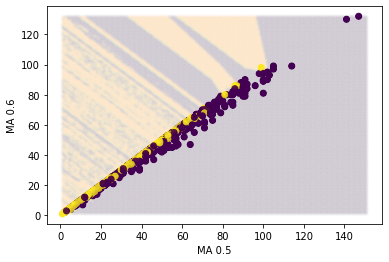

The decision boundary plot of k = 2 is: 


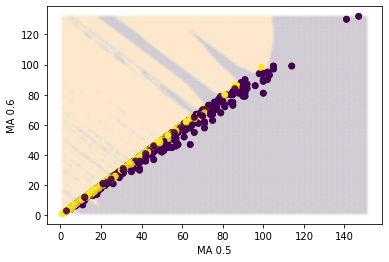

The decision boundary plot of k = 3 is: 


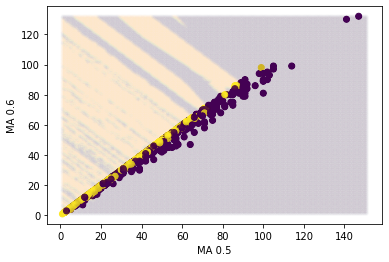

The decision boundary plot of k = 4 is: 


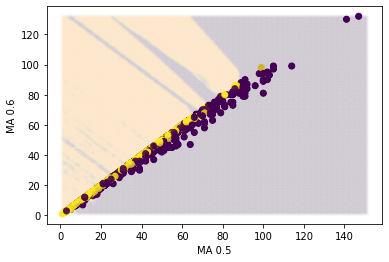

The decision boundary plot of k = 5 is: 


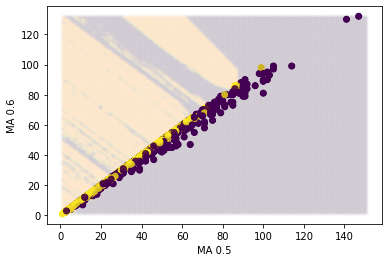

The decision boundary plot of k = 6 is: 


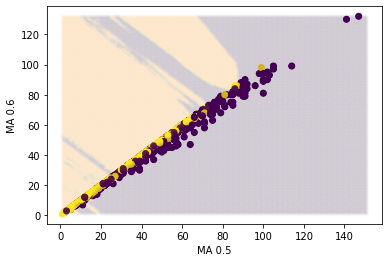

The decision boundary plot of k = 7 is: 


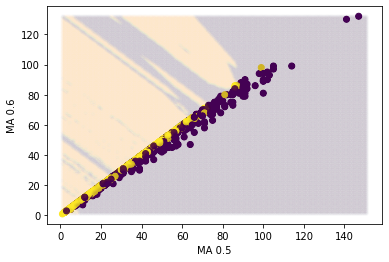

The decision boundary plot of k = 8 is: 


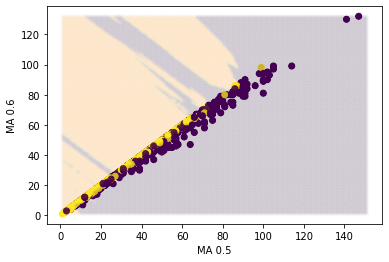

The decision boundary plot of k = 9 is: 


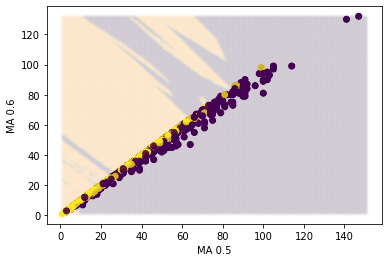

The decision boundary plot of k = 10 is: 


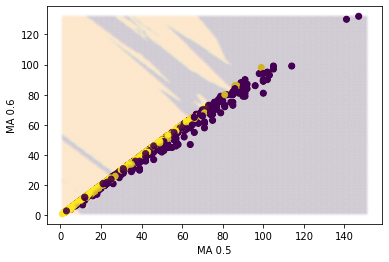

The decision boundary plot of k = 11 is: 


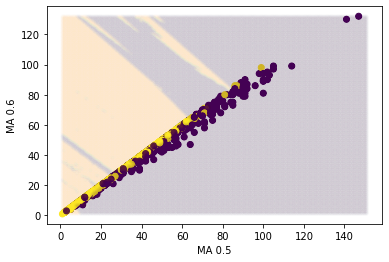

The decision boundary plot of k = 12 is: 


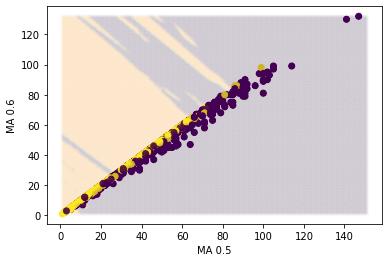

The decision boundary plot of k = 13 is: 


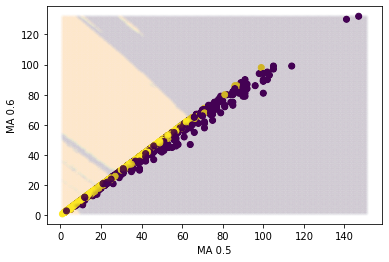

The decision boundary plot of k = 14 is: 


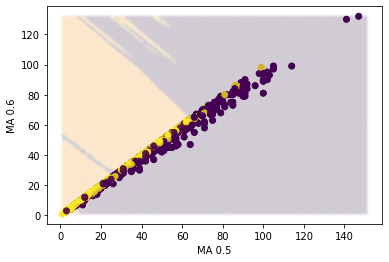

        Test Accuracy  Train Accuracy  Accuracy Diff
K = 7        0.669565        0.743176       0.073611
K = 6        0.657971        0.754342       0.096371
K = 8        0.657971        0.730769       0.072798
K = 14       0.655072        0.688586       0.033513
K = 9        0.649275        0.719603       0.070328
K = 12       0.649275        0.700993       0.051717
K = 13       0.646377        0.704715       0.058338
K = 10       0.643478        0.705955       0.062477
K = 11       0.637681        0.702233       0.064552
K = 5        0.631884        0.764268       0.132384
K = 1        0.628986        1.000000       0.371014
K = 4        0.626087        0.777916       0.151829
K = 3        0.620290        0.827543       0.207254
K = 2        0.594203        0.805211       0.211008

Using manhattan function:
The decision boundary plot of k = 1 is: 


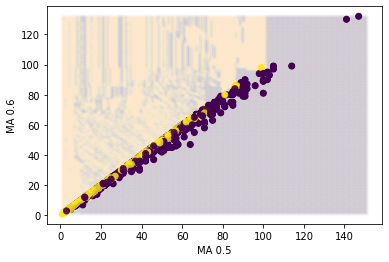

The decision boundary plot of k = 2 is: 


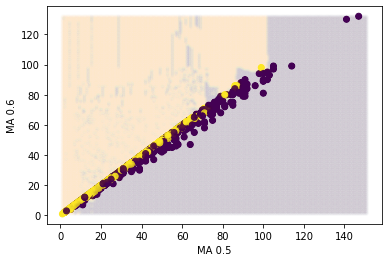

The decision boundary plot of k = 3 is: 


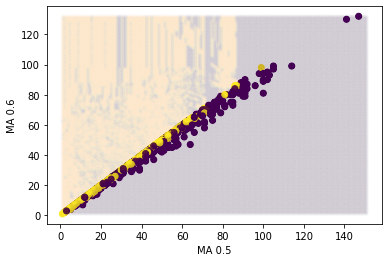

The decision boundary plot of k = 4 is: 


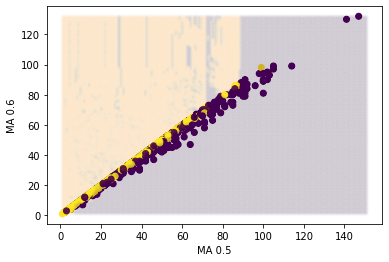

The decision boundary plot of k = 5 is: 


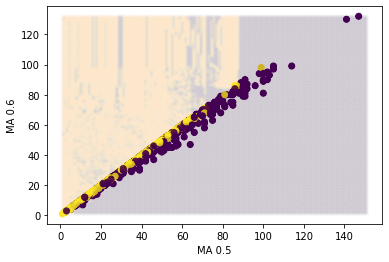

The decision boundary plot of k = 6 is: 


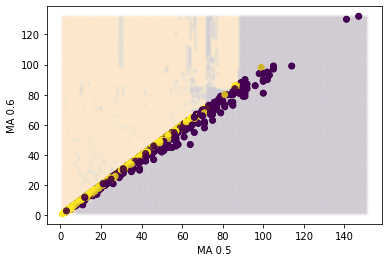

The decision boundary plot of k = 7 is: 


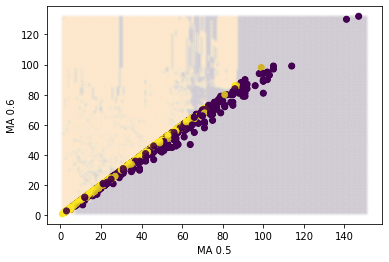

The decision boundary plot of k = 8 is: 


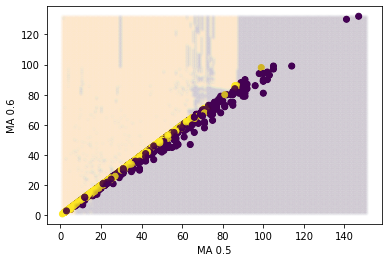

The decision boundary plot of k = 9 is: 


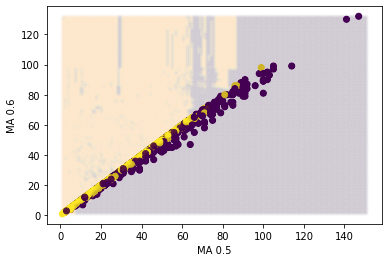

The decision boundary plot of k = 10 is: 


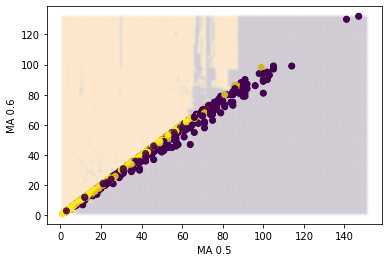

The decision boundary plot of k = 11 is: 


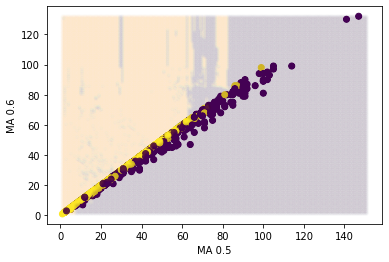

The decision boundary plot of k = 12 is: 


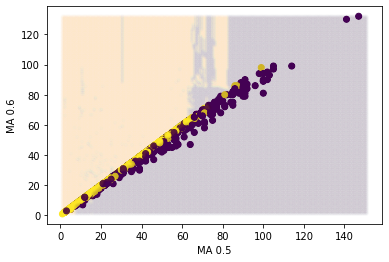

The decision boundary plot of k = 13 is: 


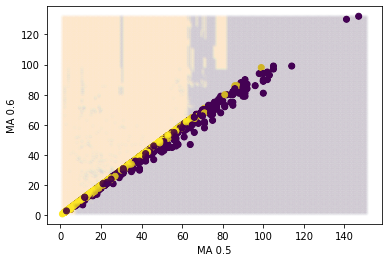

The decision boundary plot of k = 14 is: 


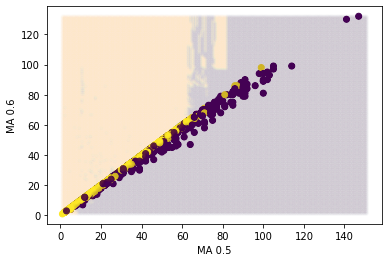

        Test Accuracy  Train Accuracy  Accuracy Diff
K = 9        0.692754        0.727047       0.034294
K = 8        0.689855        0.733251       0.043396
K = 10       0.678261        0.719603       0.041342
K = 7        0.675362        0.758065       0.082702
K = 14       0.672464        0.699752       0.027288
K = 13       0.669565        0.715881       0.046316
K = 6        0.666667        0.761787       0.095120
K = 12       0.666667        0.715881       0.049214
K = 11       0.663768        0.719603       0.055835
K = 4        0.646377        0.758065       0.111688
K = 3        0.643478        0.827543       0.184065
K = 5        0.631884        0.785360       0.153476
K = 2        0.628986        0.794045       0.165059
K = 1        0.623188        1.000000       0.376812


In [349]:
# KNN Run experiment

# The 2 features with the highest correlations and least binary features
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

# predefined euclidean function

print("Modeling Hepdata set:")
print("Using euclidean function:")
df = runKNNandPlot(range(1,15),euclidean,xtrain_hep,ytrain_hep,xtest_hep,ytest_hep,x_new_hep,x_all_hep,x_axis_name_hep,y_axis_name_hep)
print(df)
print()
print("Using manhattan function:")
df = runKNNandPlot(range(1,15),manhattan,xtrain_hep,ytrain_hep,xtest_hep,ytest_hep,x_new_hep,x_all_hep,x_axis_name_hep,y_axis_name_hep)
print(df)

print("------------------------------------------------------------------")
print("Modeling Drdata set:")
print("Using euclidean  function:")
df = runKNNandPlot(range(1,15),euclidean,xtrain_dr,ytrain_dr,xtest_dr,ytest_dr,x_new_dr,x_all_dr,x_axis_name_dr,y_axis_name_dr)
print(df)
print()
print("Using manhattan function:")
df = runKNNandPlot(range(1,15),manhattan,xtrain_dr,ytrain_dr,xtest_dr,ytest_dr,x_new_dr,x_all_dr,x_axis_name_dr,y_axis_name_dr)
print(df)



## Decision Tree

In [352]:
def runDTandPlot(max_depth_range,x_train,y_train,x_test,y_test,costFn,x_2col,x_all,xname,yname):
  result_list = []
  depth_index = []
  for md in max_depth_range:
    tree = DecisionTree(max_depth=md,cost_fn= costFn)
    # predict test accuracy and train
    probs_test = tree.fit(x_train, y_train).predict(x_test)
    y_pred = np.argmax(probs_test,1)
    acc_test = evaluate_acc_DT(y_pred,y_test)
    probs_test = tree.fit(x_train, y_train).predict(x_train)
    y_pred = np.argmax(probs_test,1)
    acc_train = evaluate_acc_DT(y_pred,y_train)

    result_list.append([acc_test,acc_train,abs(acc_test-acc_train)])
    depth_index.append(f"Max_depth = {md}")
  
    #set up plot
    print(f"Decision Boundary of max depth {md}:")
    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

    y_prob_all = tree.fit(x_2col, y_train).predict(x_all)
    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]),np.argmax(y_prob_all,axis=-1)] = 1
    
    plt.scatter(x_2col[:,0], x_2col[:,1], c=y_train_prob[:,0], marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all[:,0], marker='.', alpha=0.01)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()
    print()
  df = pd.DataFrame(result_list,columns=["Test Accuracy","Train Accuracy","Accuracy Diff"],index=depth_index)
  df = df.sort_values(by="Test Accuracy",ascending=False)
  return df

------------------------------------------------------------------
Modeling Hepdata set:
Using cost entropy
Decision Boundary of max depth 1:


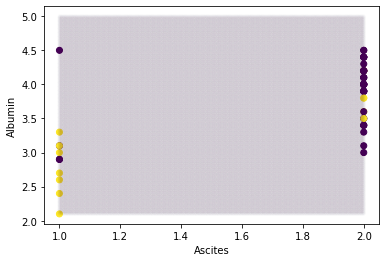


Decision Boundary of max depth 2:


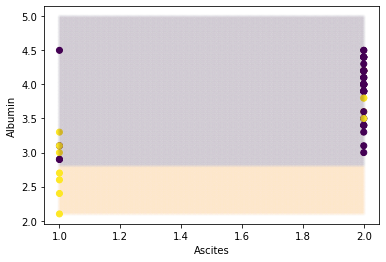


Decision Boundary of max depth 3:


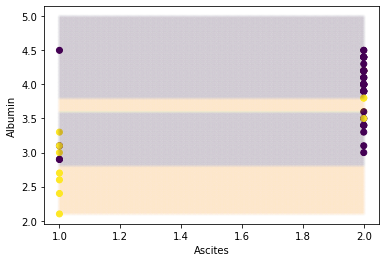


Decision Boundary of max depth 4:


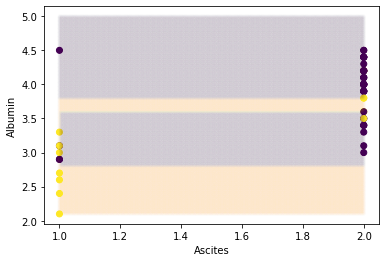


Decision Boundary of max depth 5:


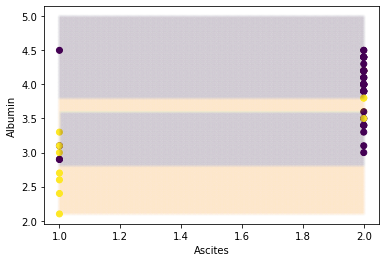


Decision Boundary of max depth 6:


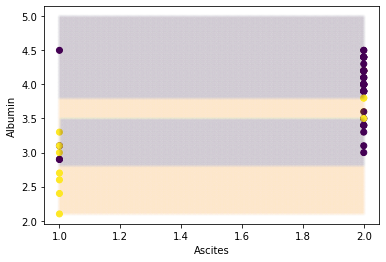


Decision Boundary of max depth 7:


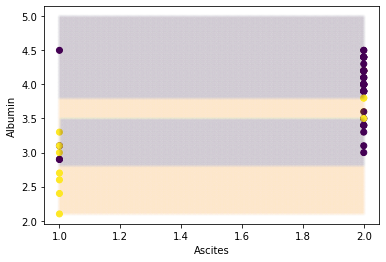


Decision Boundary of max depth 8:


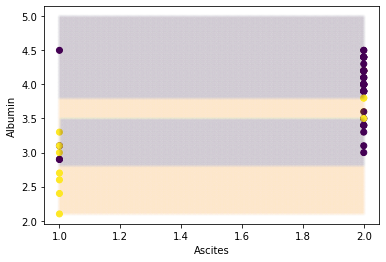


Decision Boundary of max depth 9:


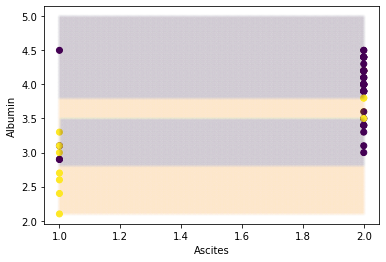


               Test Accuracy  Train Accuracy  Accuracy Diff
Max_depth = 2       0.958333        0.928571       0.029762
Max_depth = 3       0.958333        0.964286       0.005952
Max_depth = 4       0.916667        1.000000       0.083333
Max_depth = 5       0.916667        1.000000       0.083333
Max_depth = 6       0.916667        1.000000       0.083333
Max_depth = 7       0.916667        1.000000       0.083333
Max_depth = 8       0.916667        1.000000       0.083333
Max_depth = 9       0.916667        1.000000       0.083333
Max_depth = 1       0.875000        0.821429       0.053571
Using cost misclassification
Decision Boundary of max depth 1:


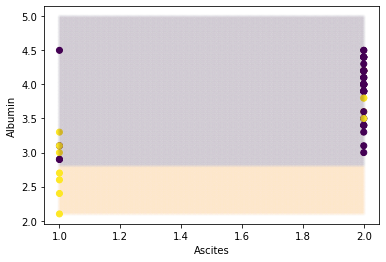


Decision Boundary of max depth 2:


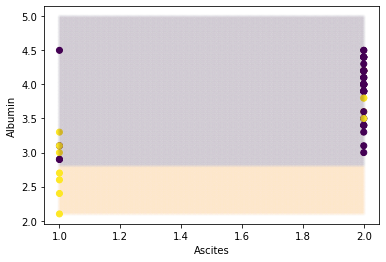


Decision Boundary of max depth 3:


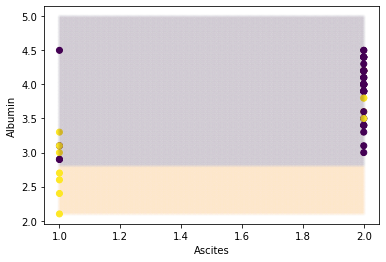


Decision Boundary of max depth 4:


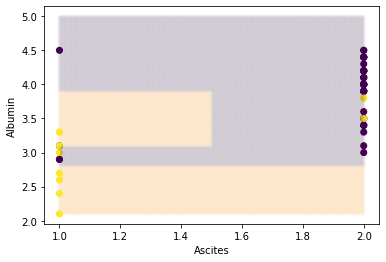


Decision Boundary of max depth 5:


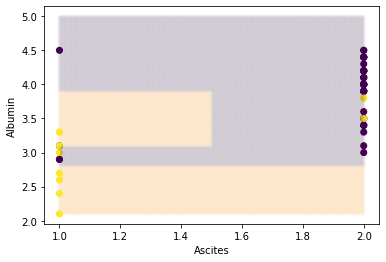


Decision Boundary of max depth 6:


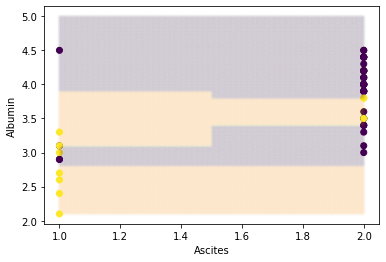


Decision Boundary of max depth 7:


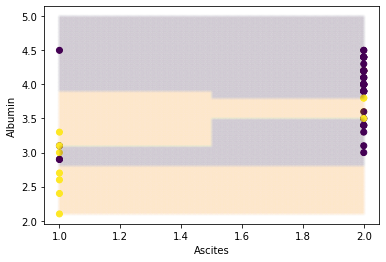


Decision Boundary of max depth 8:


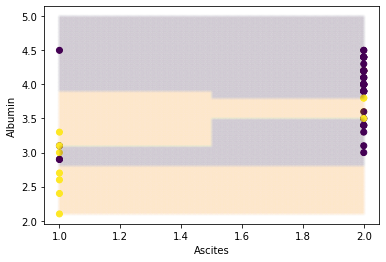


Decision Boundary of max depth 9:


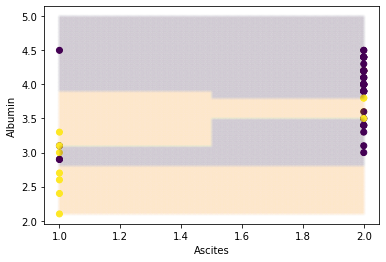


               Test Accuracy  Train Accuracy  Accuracy Diff
Max_depth = 2       0.958333        0.875000       0.083333
Max_depth = 5       0.958333        0.982143       0.023810
Max_depth = 6       0.958333        0.982143       0.023810
Max_depth = 1       0.916667        0.857143       0.059524
Max_depth = 3       0.916667        0.892857       0.023810
Max_depth = 4       0.916667        0.946429       0.029762
Max_depth = 7       0.916667        1.000000       0.083333
Max_depth = 8       0.916667        1.000000       0.083333
Max_depth = 9       0.916667        1.000000       0.083333
Using cost gini index
Decision Boundary of max depth 1:


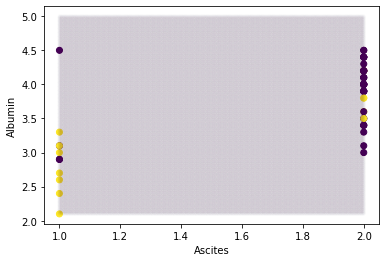


Decision Boundary of max depth 2:


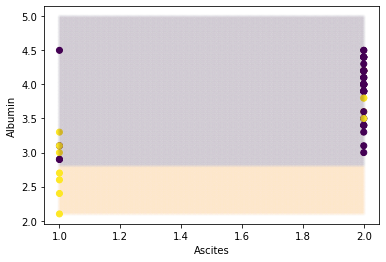


Decision Boundary of max depth 3:


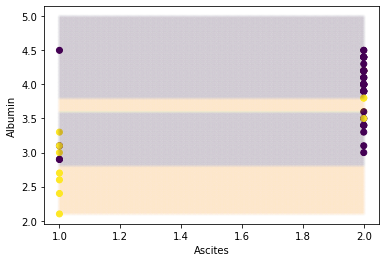


Decision Boundary of max depth 4:


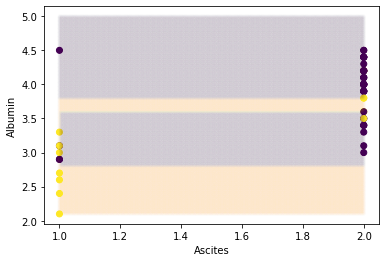


Decision Boundary of max depth 5:


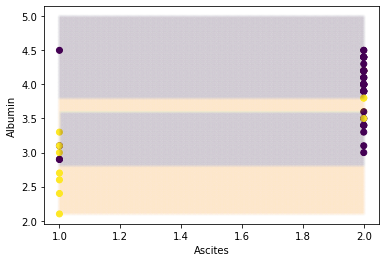


Decision Boundary of max depth 6:


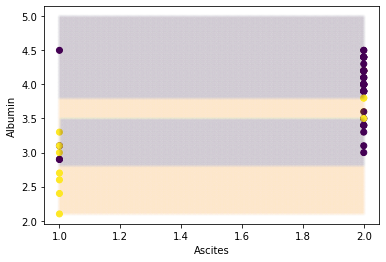


Decision Boundary of max depth 7:


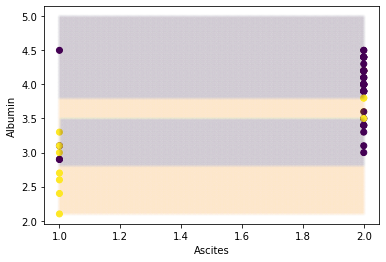


Decision Boundary of max depth 8:


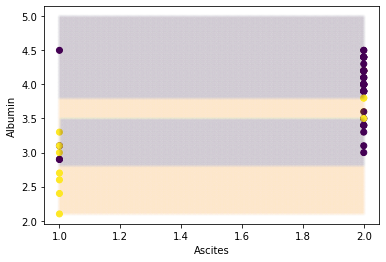


Decision Boundary of max depth 9:


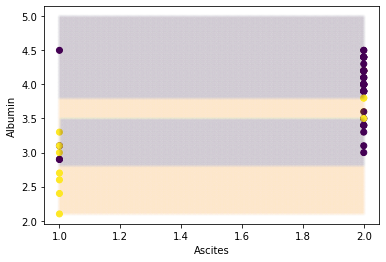


               Test Accuracy  Train Accuracy  Accuracy Diff
Max_depth = 1       0.875000        0.857143       0.017857
Max_depth = 2       0.875000        0.910714       0.035714
Max_depth = 3       0.833333        1.000000       0.166667
Max_depth = 4       0.833333        1.000000       0.166667
Max_depth = 5       0.833333        1.000000       0.166667
Max_depth = 6       0.833333        1.000000       0.166667
Max_depth = 7       0.833333        1.000000       0.166667
Max_depth = 8       0.833333        1.000000       0.166667
Max_depth = 9       0.833333        1.000000       0.166667
Modeling Drdata set:
Using cost entropy
Decision Boundary of max depth 20:


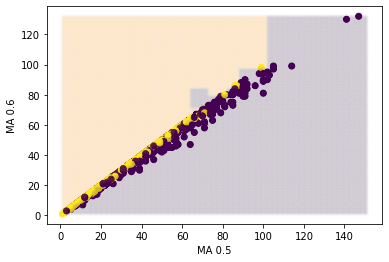


Decision Boundary of max depth 25:


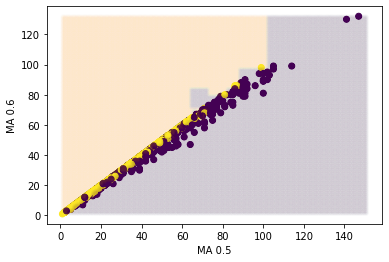


Decision Boundary of max depth 30:


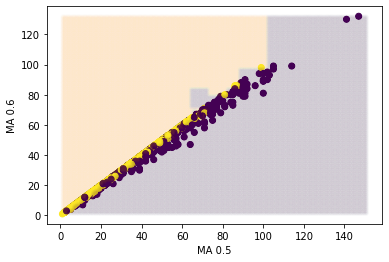


                Test Accuracy  Train Accuracy  Accuracy Diff
Max_depth = 25       0.660870        0.995037       0.334168
Max_depth = 30       0.657971        1.000000       0.342029
Max_depth = 20       0.652174        0.967742       0.315568
Using cost misclassification
Decision Boundary of max depth 20:


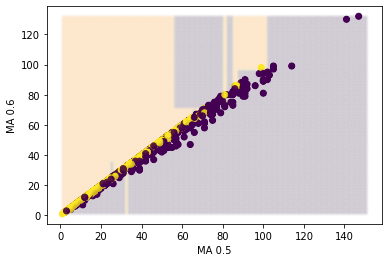


Decision Boundary of max depth 25:


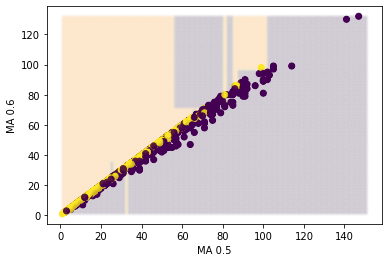


Decision Boundary of max depth 30:


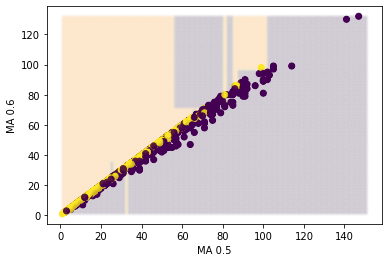


                Test Accuracy  Train Accuracy  Accuracy Diff
Max_depth = 20       0.594203        0.933002       0.338800
Max_depth = 25       0.585507        0.970223       0.384716
Max_depth = 30       0.585507        0.998759       0.413252
Using cost gini index
Decision Boundary of max depth 20:


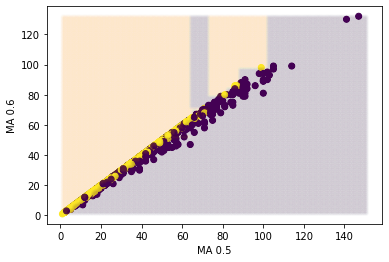


Decision Boundary of max depth 25:


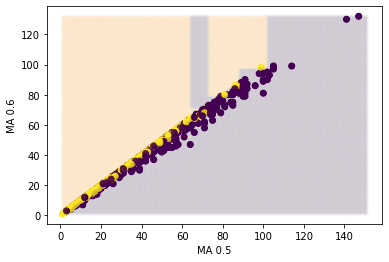


Decision Boundary of max depth 30:


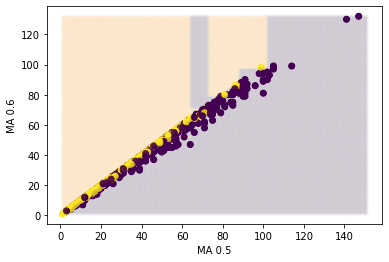


                Test Accuracy  Train Accuracy  Accuracy Diff
Max_depth = 20       0.646377        0.996278       0.349901
Max_depth = 25       0.646377        1.000000       0.353623
Max_depth = 30       0.646377        1.000000       0.353623


In [353]:
#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

# cost_entropy predefined


#Hep data set
print("------------------------------------------------------------------")
print("Modeling Hepdata set:")
hepRange = range(1,10)
print("Using cost entropy")
df =runDTandPlot(hepRange,xtrain_hep, ytrain_hep,xtest_hep,ytest_hep,cost_entropy,x_new_hep,x_all_hep,x_axis_name_hep,y_axis_name_hep)
print(df)
print("Using cost misclassification")
df =runDTandPlot(hepRange,xtrain_hep, ytrain_hep,xtest_hep,ytest_hep,cost_misclassification,x_new_hep,x_all_hep,x_axis_name_hep,y_axis_name_hep)
print(df)
print("Using cost gini index")
df =runDTandPlot(hepRange,xtrain_hep, ytrain_hep,xtest_hep,ytest_hep,cost_gini_index,x_new_hep,x_all_hep,x_axis_name_hep,y_axis_name_hep)
print(df)

# Dr data set
print("Modeling Drdata set:")
drRange = range(20,31,5)
print("Using cost entropy")
df = runDTandPlot(drRange,xtrain_dr,ytrain_dr,xtest_dr,ytest_dr,cost_entropy,x_new_dr,x_all_dr,x_axis_name_dr,y_axis_name_dr)
print(df)
print("Using cost misclassification")
df = runDTandPlot(drRange,xtrain_dr,ytrain_dr,xtest_dr,ytest_dr,cost_misclassification,x_new_dr,x_all_dr,x_axis_name_dr,y_axis_name_dr)
print(df)
print("Using cost gini index")
df = runDTandPlot(drRange,xtrain_dr,ytrain_dr,xtest_dr,ytest_dr,cost_gini_index,x_new_dr,x_all_dr,x_axis_name_dr,y_axis_name_dr)
print(df)



